In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

from utils import *
from utils_plotting import *

In [3]:
sns.set(style='ticks')

# Prepare data

In [4]:
kids_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv', sdss_cleaning=True, cut='r')

Data shape: (91317, 49)
Droping NANs: 89513 left
Removing limiting magnitudes: 74196 left
Removing errors bigger than 1: 74191 left
Removing KiDS flags: 55787 left
Cleaning SDSS: 52010 left
Removing R > 22: 51752 left


In [7]:
catalog_star = pd.read_csv('outputs/catalogs/KiDS_DR3_x_SDSS_DR14_star_sdss-clean_rf_f-all_cut-r__2018-04-16_11:12:22.csv')
catalog_non_star = pd.read_csv('outputs/catalogs/KiDS_DR3_x_SDSS_DR14_non-star_sdss-clean_rf_f-all_cut-r__2018-04-16_11:16:30.csv')

print(catalog_star.shape)
print(catalog_non_star.shape)

(1147110, 20)
(1545091, 20)


In [8]:
kids_x_gaia = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.GAIA.DR2.cols.csv', sdss_cleaning=False, cut='r')

Data shape: (1965257, 54)
Droping NANs: 1937863 left
Removing limiting magnitudes: 1619408 left
Removing errors bigger than 1: 1619387 left
Removing KiDS flags: 1080301 left
Removing R > 22: 1080253 left


In [9]:
for catalog in [catalog_star, catalog_non_star]:
    catalog['train'] = catalog['ID'].isin(kids_x_sdss['ID'])

catalog = pd.concat([catalog_star, catalog_non_star])
print(catalog.shape)

(2692201, 21)


In [10]:
catalog_x_gaia = pd.merge(catalog, kids_x_gaia, on='ID', suffixes=('', '_right'))

In [11]:
qso_kids_sdss = kids_x_sdss.loc[kids_x_sdss['CLASS'] == 'QSO']
qso_catalog = catalog.loc[catalog['CLASS'] == 'QSO']

In [12]:
qso_catalog_star = catalog_star.loc[catalog_star['CLASS'] == 'QSO']
qso_catalog_non_star = catalog_non_star.loc[catalog_non_star['CLASS'] == 'QSO']

In [13]:
catalog_sampled = catalog.sample(n=500000, random_state=1567)
qso_catalog_sampled = qso_catalog.sample(n=100000, random_state=1567)

In [14]:
catalog_star_sampled = catalog_star.sample(20000, random_state=78356)
catalog_non_star_sampled = catalog_non_star.sample(20000, random_state=78356)

In [15]:
catalog_north = catalog.loc[catalog['DECJ2000'] > -15]
catalog_south = catalog.loc[catalog['DECJ2000'] < -15]

In [16]:
kids_x_sdss_star = kids_x_sdss.loc[kids_x_sdss['CLASS_STAR'] >= 0.5]
kids_x_sdss_non_star = kids_x_sdss.loc[kids_x_sdss['CLASS_STAR'] <= 0.5]

In [17]:
catalog_star_non_train = catalog_star.loc[catalog_star['train'] == False]
qso_catalog_star_non_train = qso_catalog_star.loc[qso_catalog_star['train'] == False]

# Describe data

In [18]:
print(qso_catalog_star.shape[0])
print(qso_catalog_non_star.shape[0])

148212
11451


In [19]:
describe_column(kids_x_sdss['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([32547,  7061, 12144]),
 array([62.89032308, 13.64391714, 23.46575978]))

In [20]:
describe_column(kids_x_sdss_star['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([  163,  6381, 11912]),
 array([ 0.88318162, 34.57412224, 64.54269614]))

In [21]:
describe_column(kids_x_sdss_non_star['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([32384,   680,   232]),
 array([97.26093224,  2.04228736,  0.69678039]))

In [22]:
describe_column(catalog['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([1536894,  159663,  995644]),
 array([57.08689656,  5.93057502, 36.98252842]))

In [23]:
describe_column(catalog_x_gaia['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([ 26167,  30454, 833546]),
 array([ 2.93956078,  3.42115581, 93.63928342]))

In [24]:
describe_column(catalog_north['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([990326, 106831, 722752]),
 array([54.4162373 ,  5.87012867, 39.71363403]))

In [25]:
describe_column(catalog_south['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([546568,  52832, 272892]),
 array([62.65883443,  6.05668744, 31.28447813]))

In [26]:
describe_column(catalog_star['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([  5652, 148212, 993246]),
 array([ 0.49271648, 12.9204697 , 86.58681382]))

In [27]:
describe_column(catalog_non_star['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([1531242,   11451,    2398]),
 array([99.10367739,  0.7411214 ,  0.15520121]))

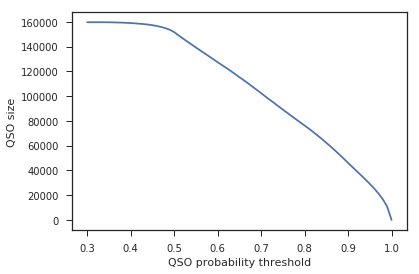

In [28]:
plot_proba_against_size(qso_catalog, column='QSO', x_lim=(0.3, 1))

# Photo catalogs

Catalog size: 2692201
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([1536894,  159663,  995644]), array([57.08689656,  5.93057502, 36.98252842]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2009.csv
external catalog x KiDS size: 19930
external catalog x KiDS catalog size: 15005, train elements: 3035
catalogs cross:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  748, 12935,  1322]), array([ 4.985005  , 86.20459847,  8.81039653]))
catalogs cross, no train:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  723, 10004,  1243]), array([ 6.04010025, 83.57560568, 10.38429407]))


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


--------------------
KiDS.DR3.x.QSO.RICHARDS.2015.csv
external catalog x KiDS size: 22368
external catalog x KiDS catalog size: 15990, train elements: 3430
catalogs cross:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  423, 14537,  1030]), array([ 2.64540338, 90.91307067,  6.44152595]))
catalogs cross, no train:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  405, 11140,  1015]), array([ 3.22452229, 88.69426752,  8.08121019]))
--------------------
KiDS.DR3.x.QSO.GALEX.csv
external catalog x KiDS size: 70749
external catalog x KiDS catalog size: 37377, train elements: 5899
catalogs cross:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([ 3489, 28393,  5495]), array([ 9.33461755, 75.96382802, 14.70155443]))
catalogs cross, no train:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([ 3384, 23020,  5074]), array([10.75036533, 73.13044031, 16.11919436]))


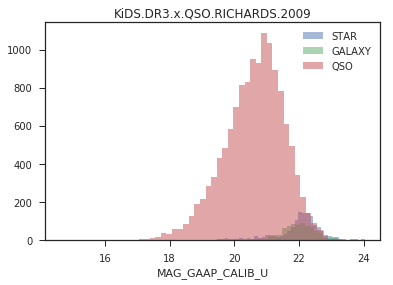

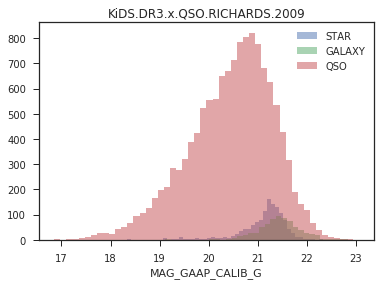

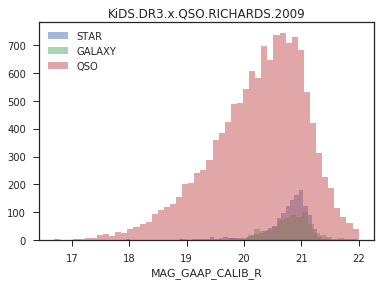

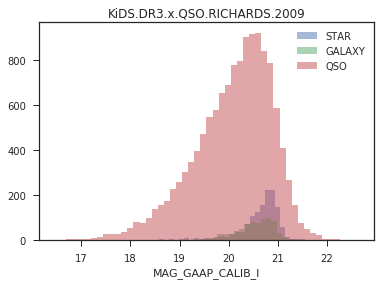

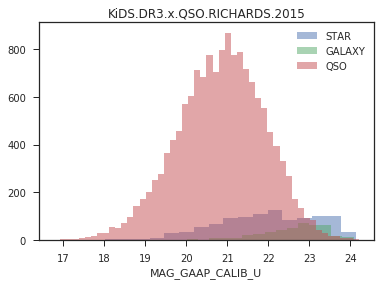

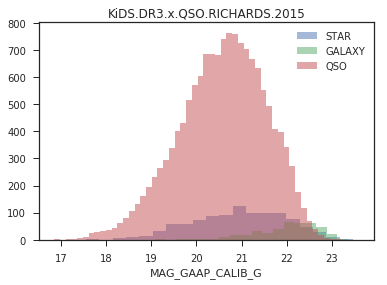

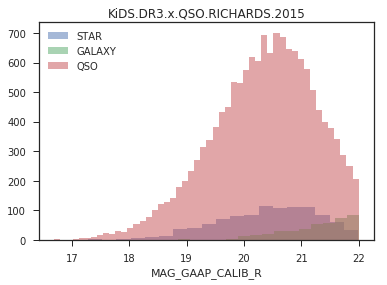

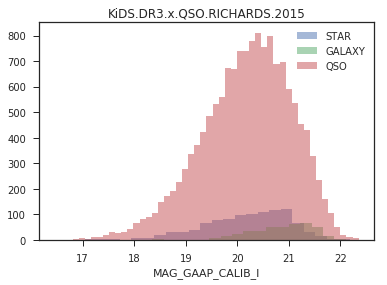

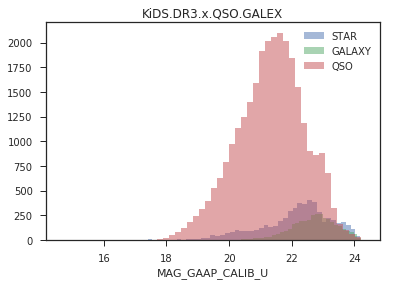

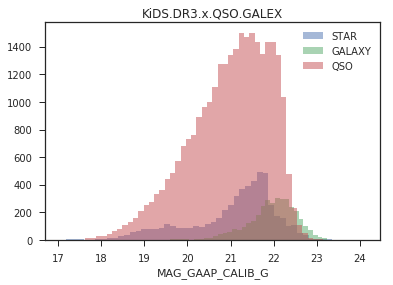

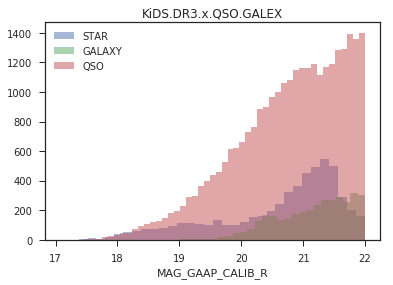

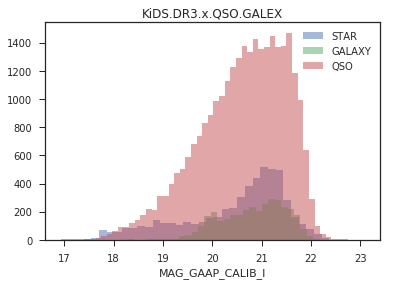

In [36]:
test_external_qso(catalog, save=False)

In [30]:
test_external_qso(catalog_star, save=False)

Catalog size: 1147110
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  5652, 148212, 993246]), array([ 0.49271648, 12.9204697 , 86.58681382]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2009.csv
external catalog x KiDS size: 19930
external catalog x KiDS catalog size: 13944, train elements: 2987
catalogs cross:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([   59, 12568,  1317]), array([ 0.42312106, 90.1319564 ,  9.44492255]))
catalogs cross, no train:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  44, 9675, 1238]), array([ 0.40156977, 88.29971708, 11.29871315]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2015.csv
external catalog x KiDS size: 22368
external catalog x KiDS catalog size: 15374, train elements: 3380
catalogs cross:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  118, 14231,  1025]), array([ 0.7675296 , 92.56537011,  6.6671003 ]))
catalogs cross, no train:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  106, 10878,  101

In [31]:
test_external_qso(catalog_non_star, save=False)

Catalog size: 1545091
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([1531242,   11451,    2398]), array([99.10367739,  0.7411214 ,  0.15520121]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2009.csv
external catalog x KiDS size: 19930
external catalog x KiDS catalog size: 1061, train elements: 48
catalogs cross:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([689, 367,   5]), array([64.93873704, 34.59000943,  0.47125353]))
catalogs cross, no train:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([679, 329,   5]), array([67.02862784, 32.47778875,  0.49358342]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2015.csv
external catalog x KiDS size: 22368
external catalog x KiDS catalog size: 616, train elements: 50
catalogs cross:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([305, 306,   5]), array([49.51298701, 49.67532468,  0.81168831]))
catalogs cross, no train:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([299, 262,   5]), array([52.82685512, 

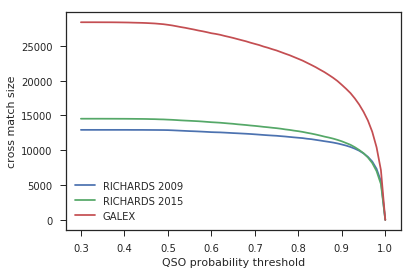

In [75]:
plot_proba_against_qxternal_qso(qso_catalog)

# GAIA motion test

Data shape: (890167, 87)
5 position shape: (768095, 87)
Removing paralax_error shape: (671922, 87)
Removing pmra_error shape: (508715, 87)
Removing pmdec_error shape: (493510, 87)
Removing parallax_norm shape: (387970, 87)
Removing pmra_norm and pmdec_norm shape: (40500, 87)
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  103,  5321, 35076]), array([ 0.25432099, 13.1382716 , 86.60740741]))


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Mean:


parallax_norm  pmra_norm pmdec_norm
QSO       -0.0548003 -0.0366643 -0.0245719
GALAXY     -0.109968  -0.359012  -0.431472
STAR         0.70815   -1.04034   -1.05364

Sigma:


parallax_norm pmra_norm pmdec_norm
QSO          1.06213   1.10654    1.12791
GALAXY       1.32801   1.74623    1.77228
STAR         1.38196   2.15047      2.094

Median:


parallax_norm  pmra_norm pmdec_norm
QSO       -0.0418627 -0.0137389 -0.0267243
GALAXY      -0.25672  -0.210831  -0.318061
STAR        0.610765   -1.29528   -1.18938

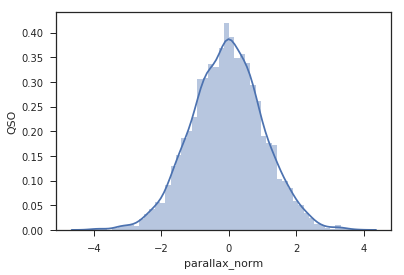

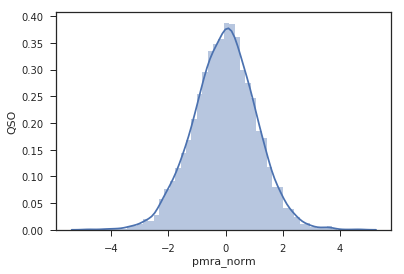

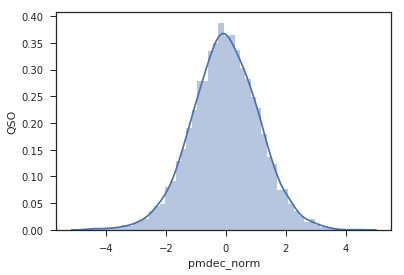

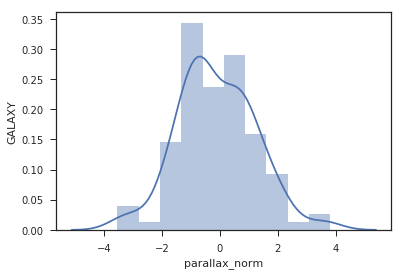

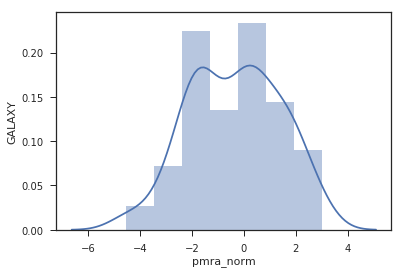

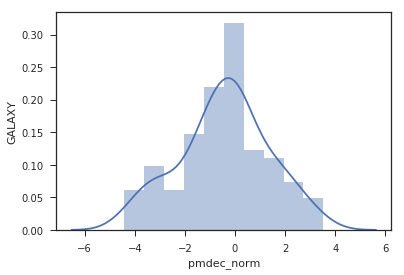

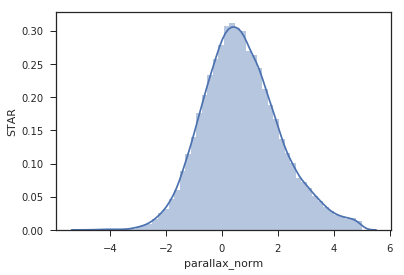

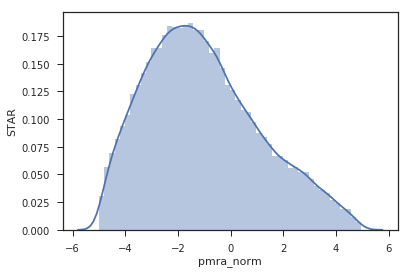

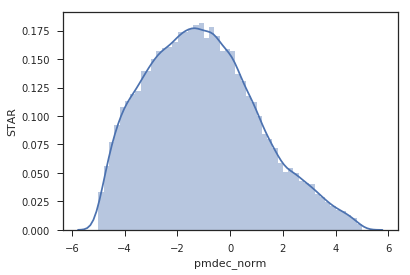

In [68]:
catalog_x_gaia_clean = process_gaia(catalog_x_gaia, error_lim=1, parallax_lim=(-5, 5), pm_lim=25)
print(describe_column(catalog_x_gaia_clean['CLASS']))
gaia_motion_analysis(catalog_x_gaia_clean)

Data shape: (890167, 87)
5 position shape: (768095, 87)
Removing parallax_norm shape: (755986, 87)
Removing pmra_norm and pmdec_norm shape: (319939, 87)
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  2651,  19460, 297828]), array([ 0.82859545,  6.08240946, 93.08899509]))


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Mean:


parallax_norm pmra_norm pmdec_norm
QSO       0.00162366 -0.140692  -0.248047
GALAXY     0.0573413 -0.255636  -0.899012
STAR        0.590534  -1.42576   -2.49504

Sigma:


parallax_norm pmra_norm pmdec_norm
QSO           1.1196   1.39905    1.54183
GALAXY       1.32679   2.58348    2.40625
STAR         1.49653   3.52498    3.29355

Median:


parallax_norm  pmra_norm pmdec_norm
QSO      -0.00822435 -0.0760802  -0.102786
GALAXY      0.018305  -0.201197  -0.490937
STAR        0.469955   -1.39758    -2.3781

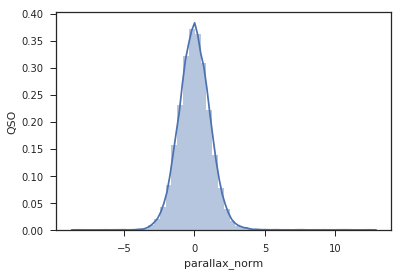

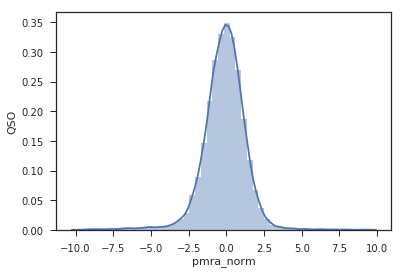

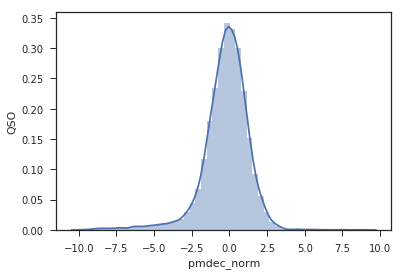

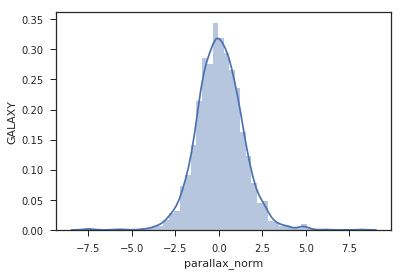

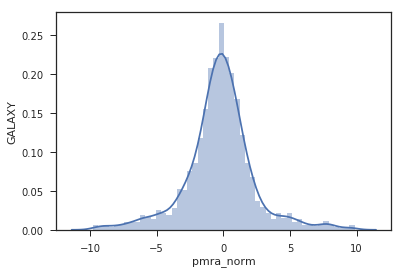

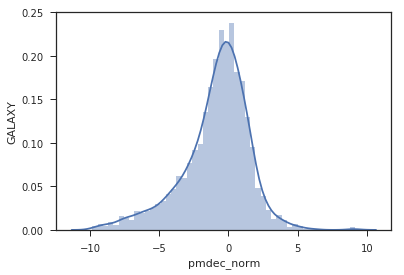

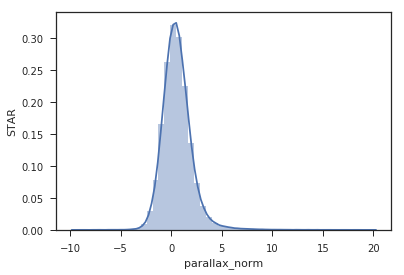

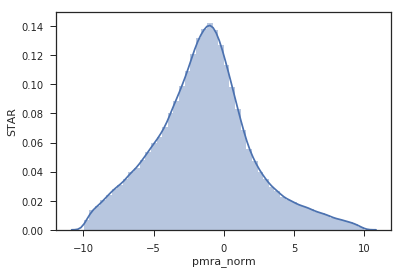

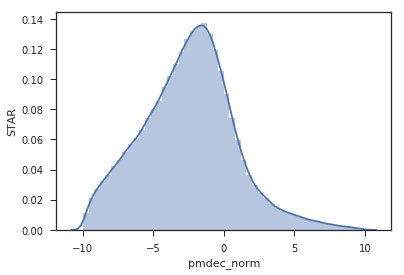

In [70]:
catalog_x_gaia_clean = process_gaia(catalog_x_gaia, error_lim=None, parallax_lim=(-10, 20), pm_lim=100)
print(describe_column(catalog_x_gaia_clean['CLASS']))
gaia_motion_analysis(catalog_x_gaia_clean)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:187: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
/home/snakoneczny/tools/python3/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/snakoneczny/tools/python3/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:192: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())
/home/snakoneczny/tools/python3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


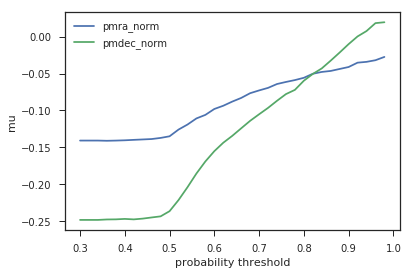

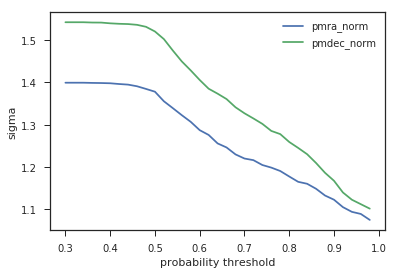

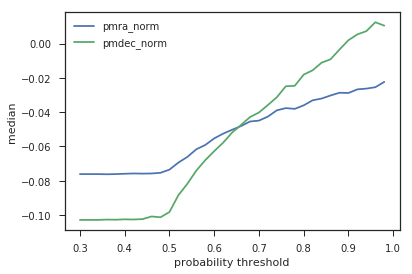

In [74]:
proba_motion_analysis(catalog_x_gaia_clean, motions=['pmra_norm', 'pmdec_norm'])

# t-SNE visualization

## Star

In [21]:
catalog_to_plot = kids_x_sdss.loc[kids_x_sdss['CLASS_STAR'] >= 0.5].sample(10000, random_state=8945)
catalog_to_plot['CLASS'] += '_SDSS'
catalog_to_plot = catalog_to_plot.append(catalog_star.loc[~catalog_star['ID'].isin(kids_x_sdss['ID'])].sample(10000, random_state=1467))

In [22]:
X = catalog_to_plot[FEATURES['magnitudes-colors-cstar']]
X_scaled = MinMaxScaler().fit_transform(X)

In [23]:
X_embedded = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000,
                  n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0,
                  random_state=8934, method='barnes_hut', angle=0.5).fit_transform(X_scaled)

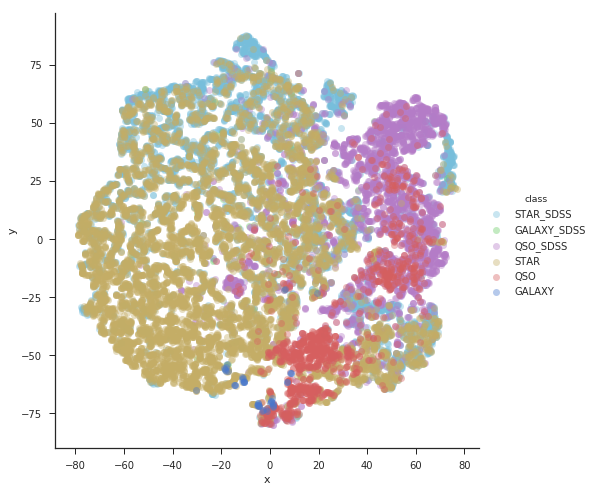

In [24]:
plot_embedding(X_embedded, catalog_to_plot['CLASS'], label='class', alpha=0.4)

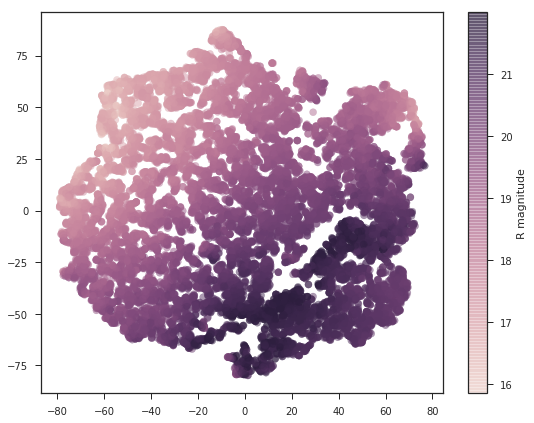

In [21]:
plot_embedding(X_embedded, catalog_to_plot[MAG_GAAP_CALIB_R], label='R magnitude', is_continuous=True)

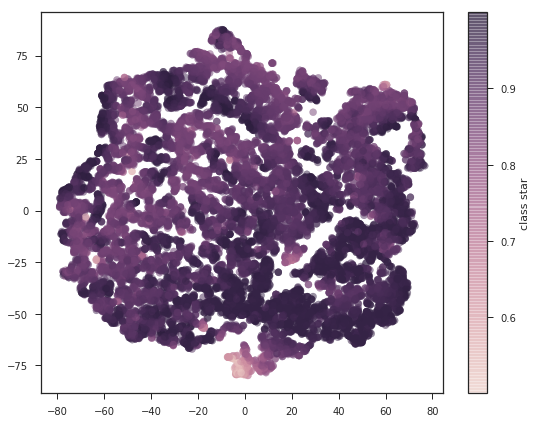

In [22]:
plot_embedding(X_embedded, catalog_to_plot['CLASS_STAR'], label='class star', is_continuous=True)

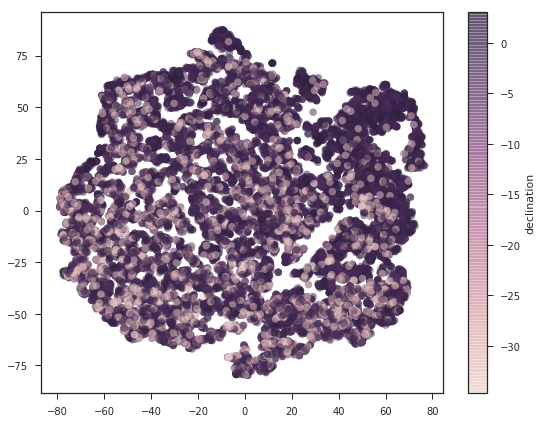

In [25]:
plot_embedding(X_embedded, catalog_to_plot['DECJ2000'], label='declination', is_continuous=True)

## Non-star

In [23]:
catalog_to_plot = kids_x_sdss.loc[kids_x_sdss['CLASS_STAR']<= 0.5].sample(10000, random_state=8945)
catalog_to_plot['CLASS'] += '_SDSS'
catalog_to_plot = catalog_to_plot.append(catalog_non_star.loc[~catalog_non_star['ID'].isin(kids_x_sdss['ID'])].sample(10000, random_state=1467))

In [24]:
X = catalog_to_plot[FEATURES['magnitudes-colors-cstar']]
X_scaled = MinMaxScaler().fit_transform(X)

In [25]:
X_embedded = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000,
                  n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0,
                  random_state=8934, method='barnes_hut', angle=0.5).fit_transform(X_scaled)

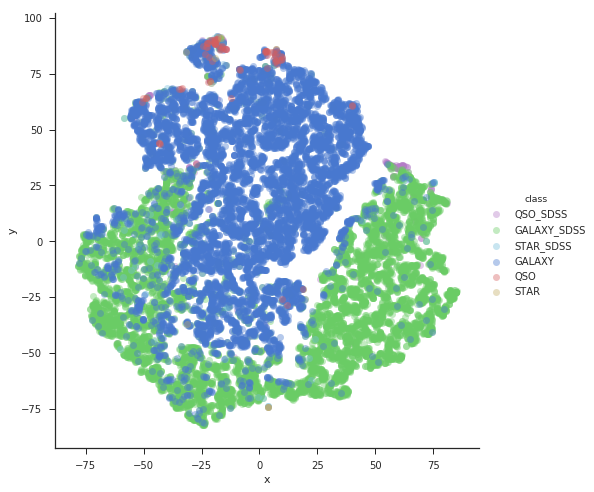

In [26]:
plot_embedding(X_embedded, catalog_to_plot['CLASS'], label='class', alpha=0.4)

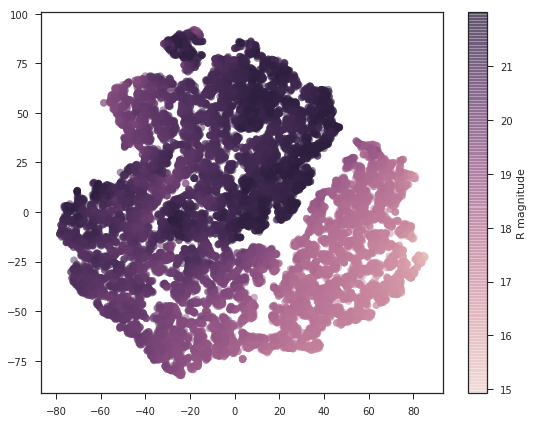

In [27]:
plot_embedding(X_embedded, catalog_to_plot[MAG_GAAP_CALIB_R], label='R magnitude', is_continuous=True)

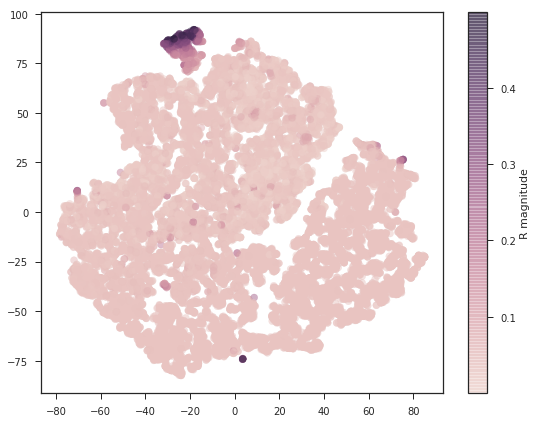

In [28]:
plot_embedding(X_embedded, catalog_to_plot['CLASS_STAR'], label='R magnitude', is_continuous=True)

# Standalone bands

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


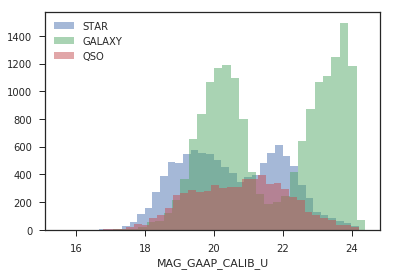

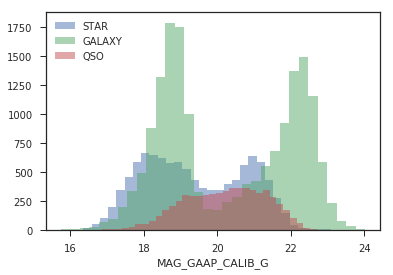

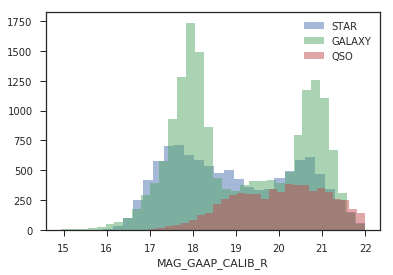

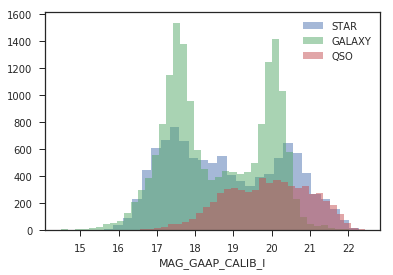

In [20]:
plot_class_histograms(kids_x_sdss, BAND_CALIB_COLUMNS)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


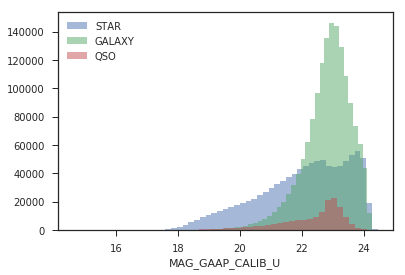

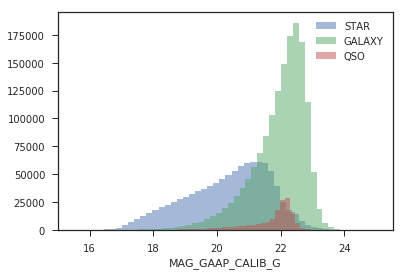

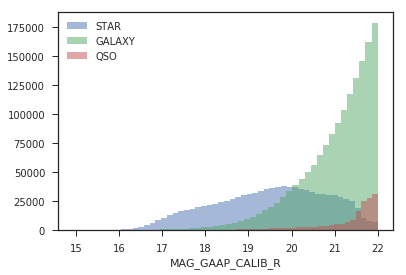

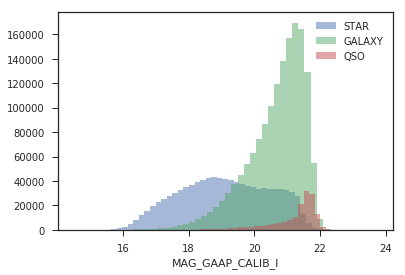

In [21]:
plot_class_histograms(catalog, BAND_CALIB_COLUMNS)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


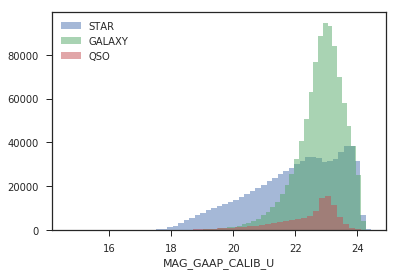

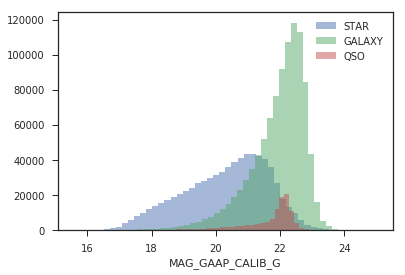

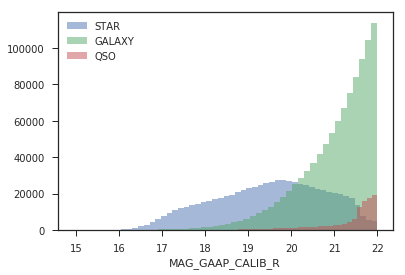

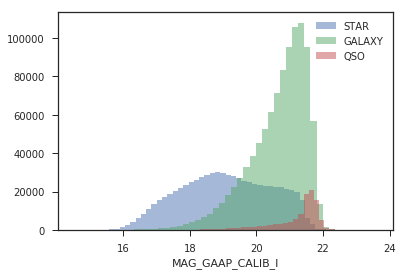

In [22]:
plot_class_histograms(catalog_north, BAND_CALIB_COLUMNS)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


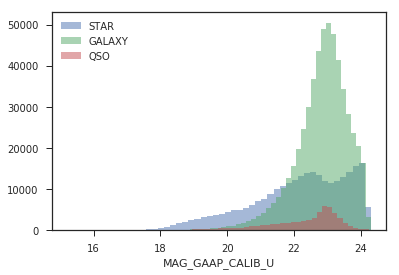

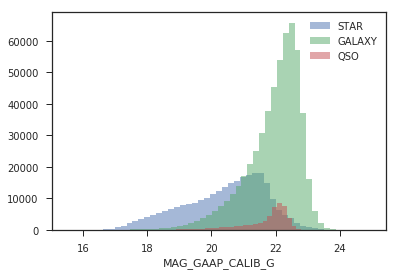

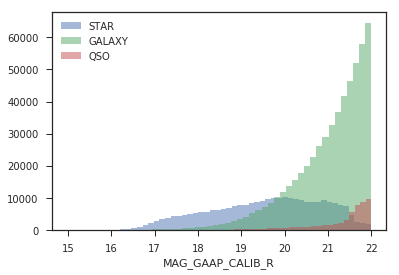

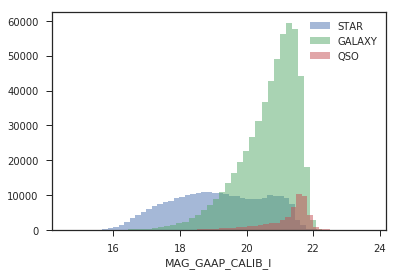

In [23]:
plot_class_histograms(catalog_south, BAND_CALIB_COLUMNS)

# Paired bands

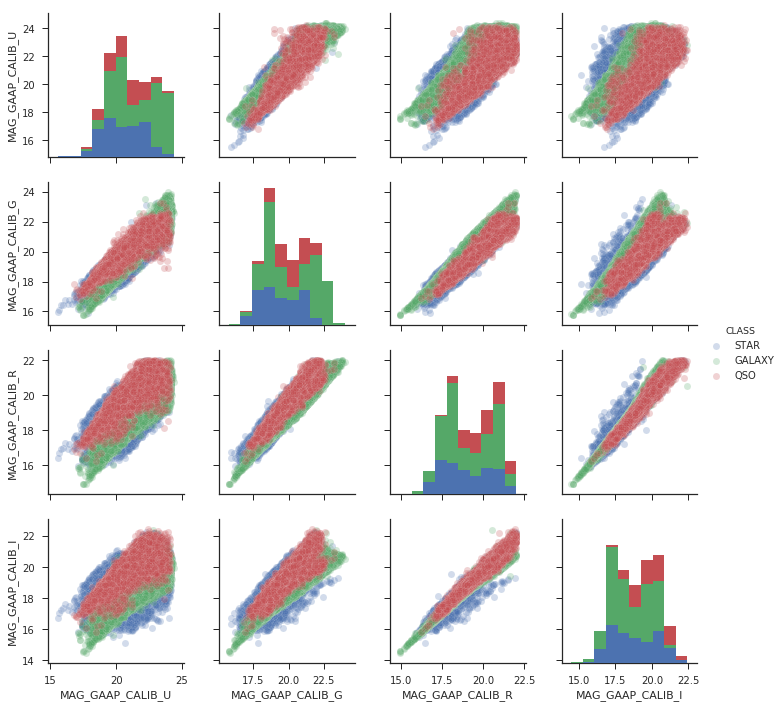

In [24]:
sns.pairplot(kids_x_sdss[np.concatenate([BAND_CALIB_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

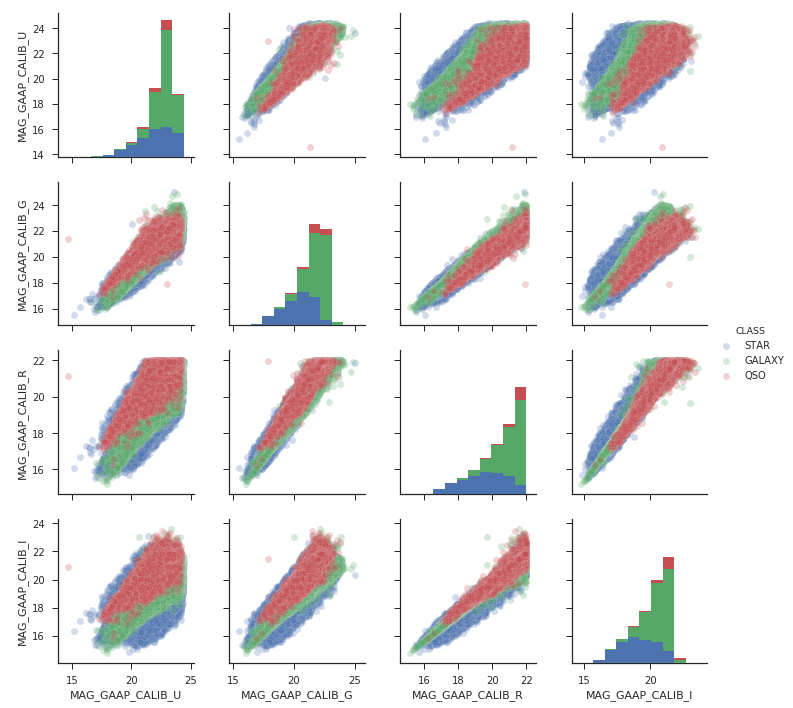

In [25]:
sns.pairplot(catalog_sampled[np.concatenate([BAND_CALIB_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

# Standalone colors

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


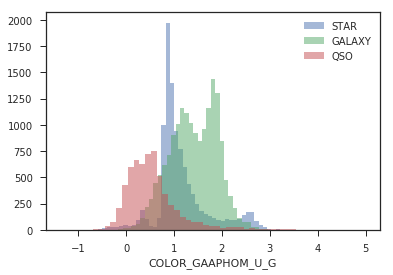

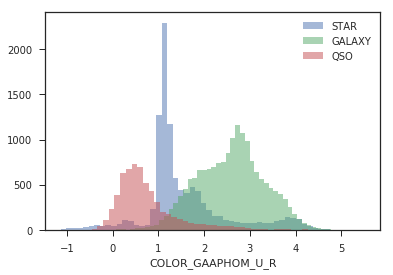

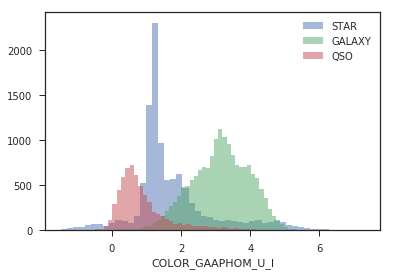

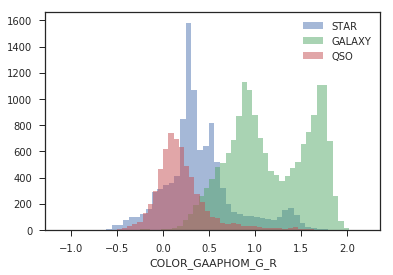

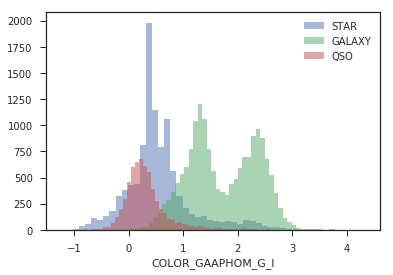

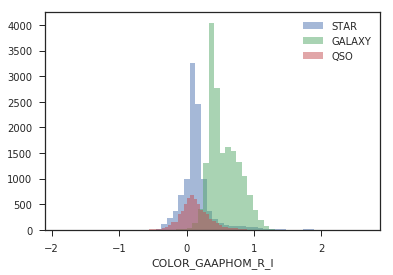

In [26]:
plot_class_histograms(kids_x_sdss, COLOR_COLUMNS)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


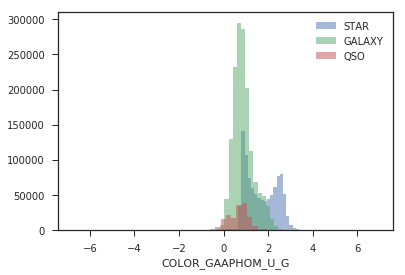

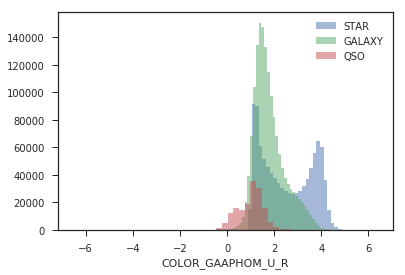

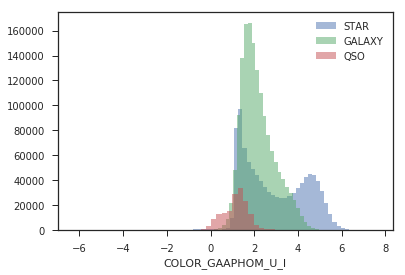

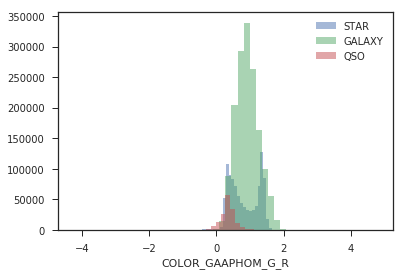

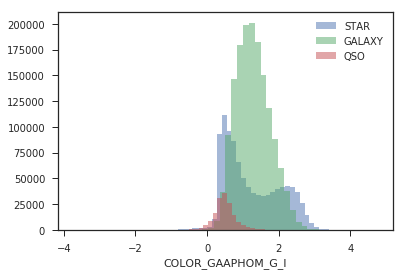

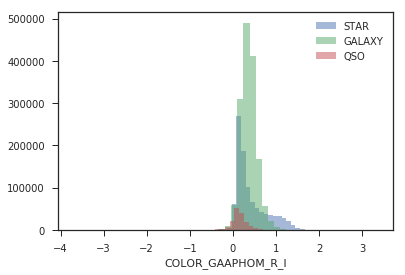

In [27]:
plot_class_histograms(catalog, COLOR_COLUMNS)

# Paired colors

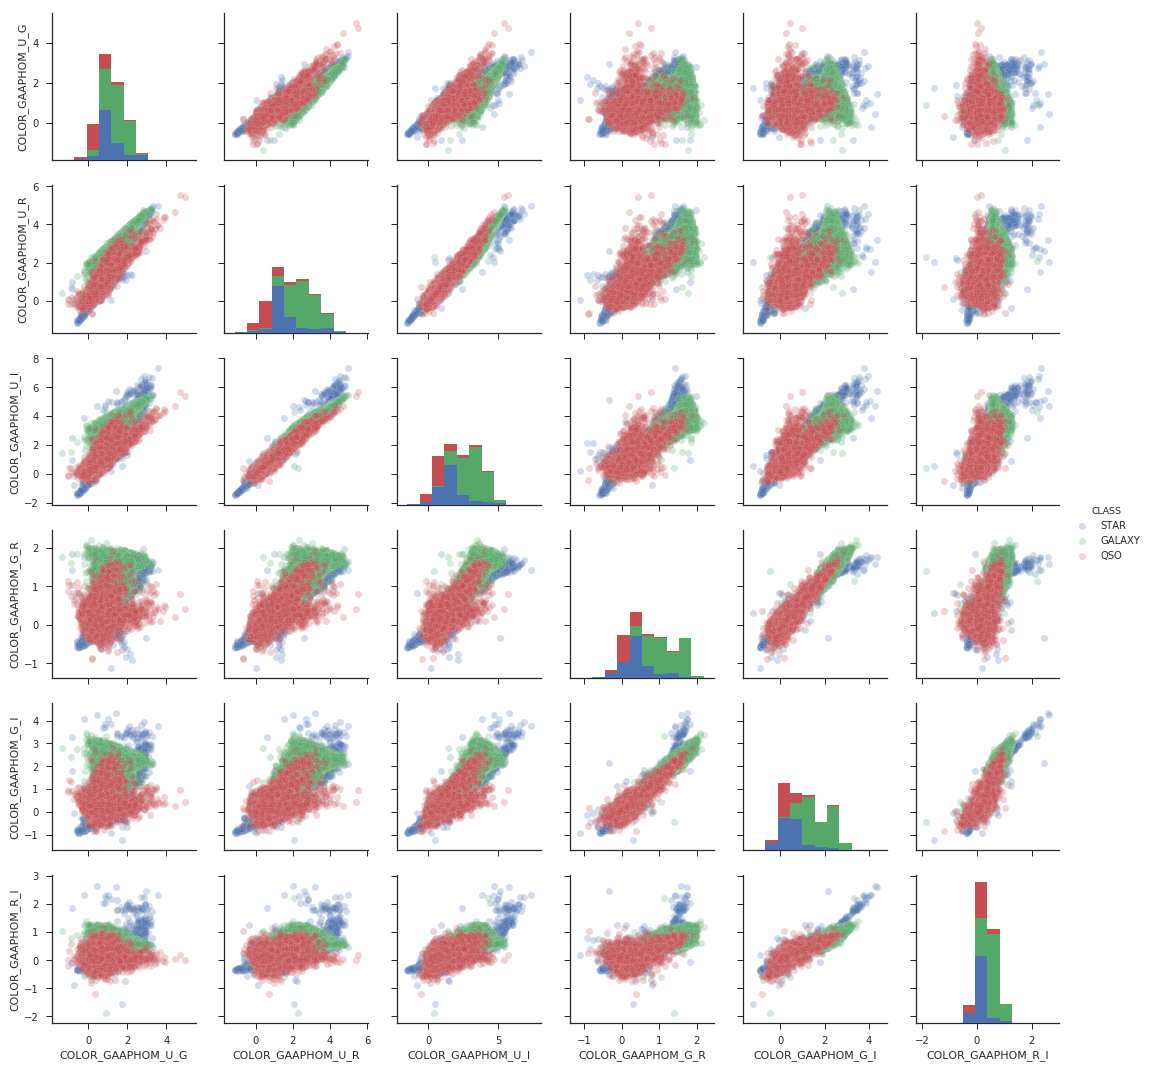

In [28]:
sns.pairplot(kids_x_sdss[np.concatenate([COLOR_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

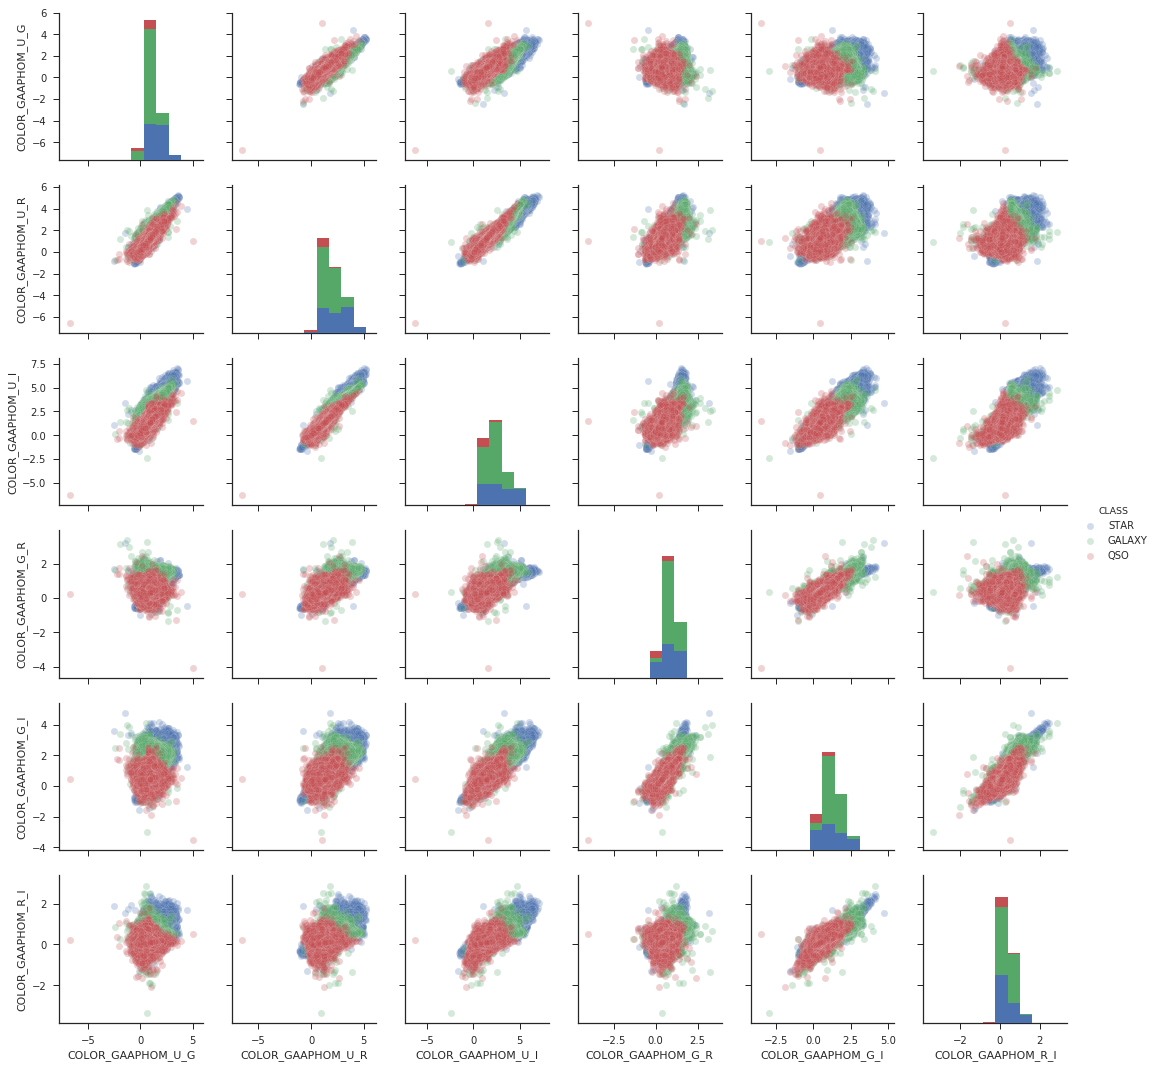

In [29]:
sns.pairplot(catalog_sampled[np.concatenate([COLOR_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

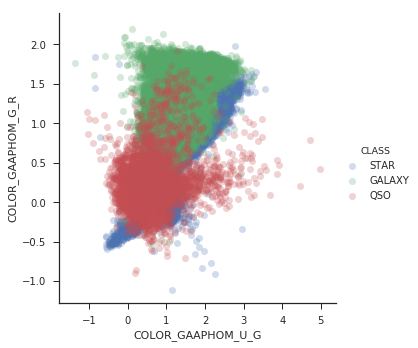

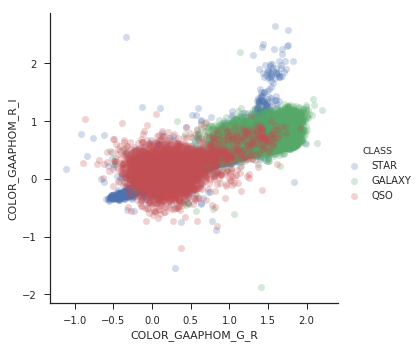

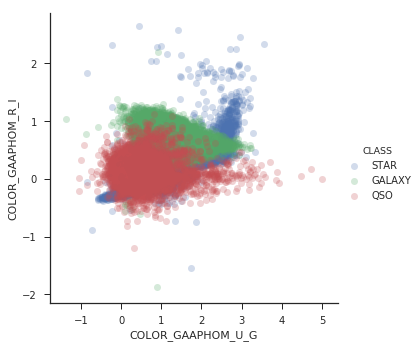

In [30]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=kids_x_sdss, fit_reg=False, scatter_kws={'alpha': 0.25})

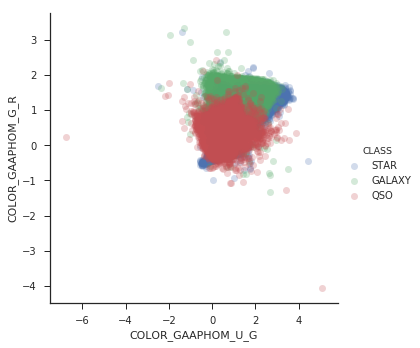

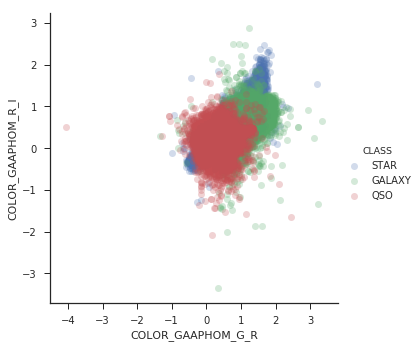

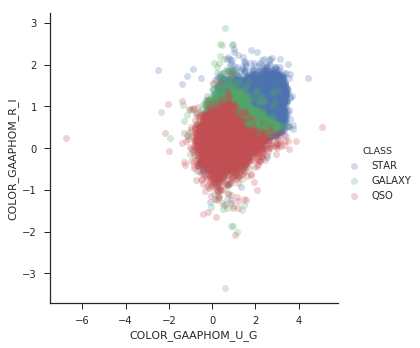

In [31]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=catalog_sampled, fit_reg=False, scatter_kws={'alpha': 0.25})

## CLASS_STAR

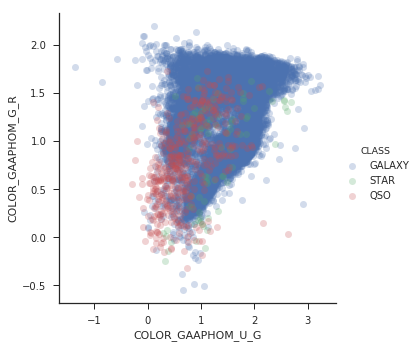

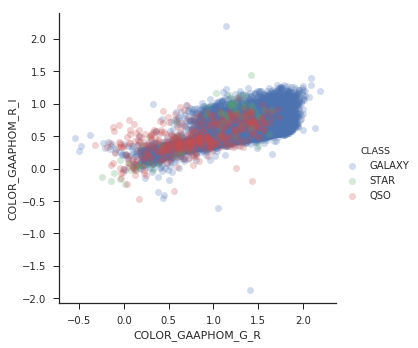

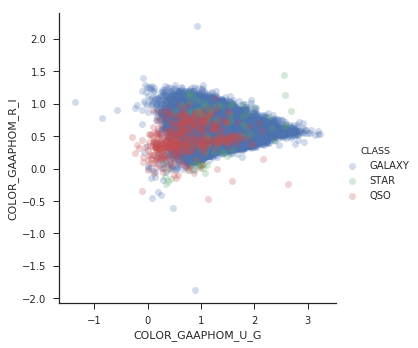

In [49]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=kids_x_sdss_non_star, fit_reg=False, scatter_kws={'alpha': 0.25})

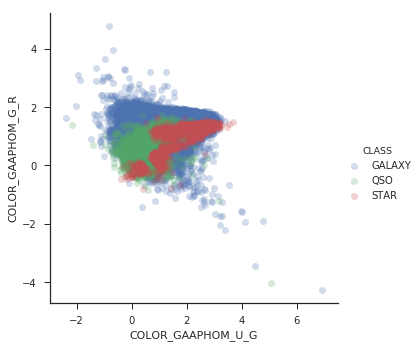

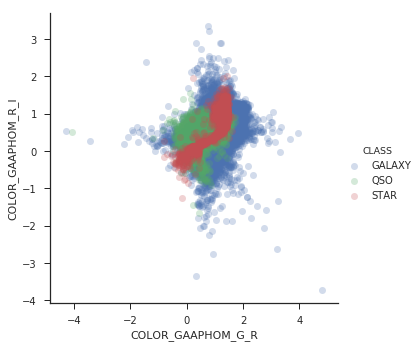

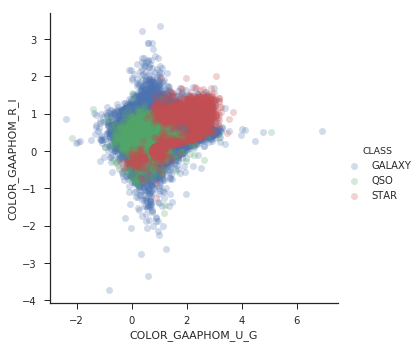

In [50]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=catalog_non_star, fit_reg=False, scatter_kws={'alpha': 0.25})

# QSO color pairs

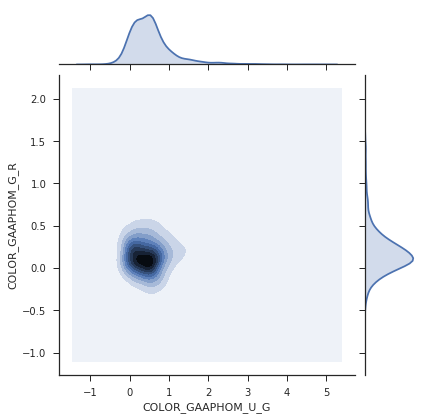

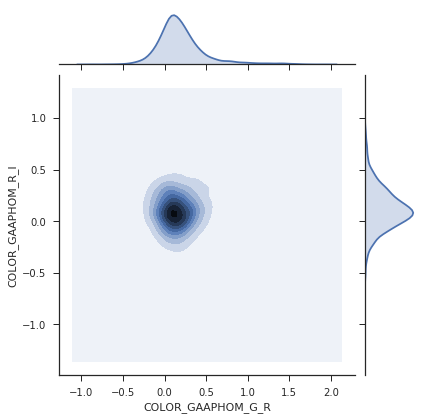

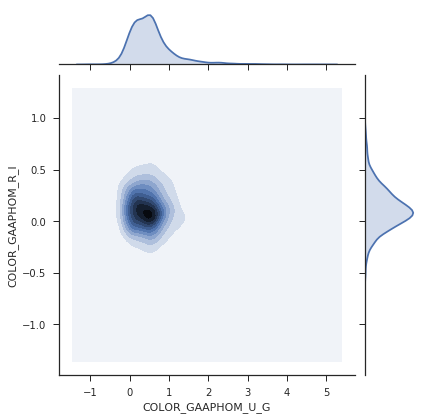

In [32]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.jointplot(qso_kids_sdss[b_1], qso_kids_sdss[b_2], kind='kde', stat_func=None)

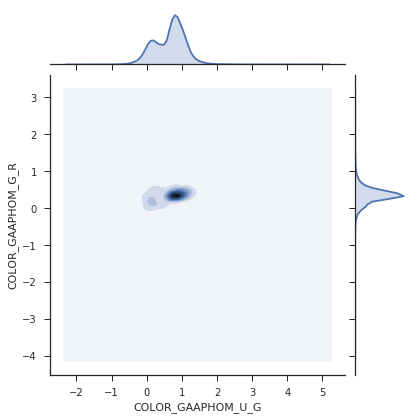

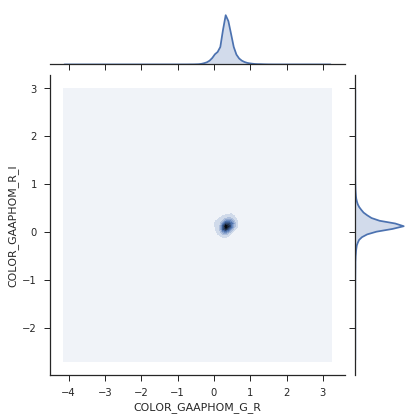

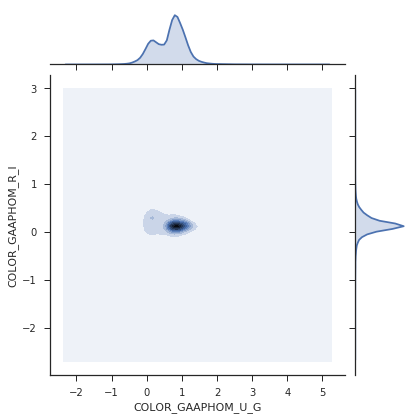

In [33]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.jointplot(qso_catalog_sampled[b_1], qso_catalog_sampled[b_2], kind='kde', stat_func=None)

# Number counts analysis

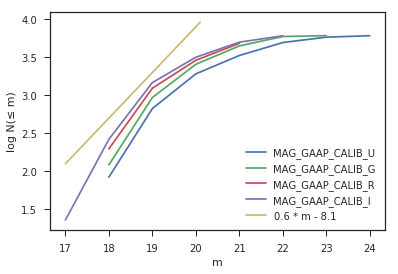

In [30]:
number_count_analysis(qso_kids_sdss, c=8.1, linear_range=(17, 20))

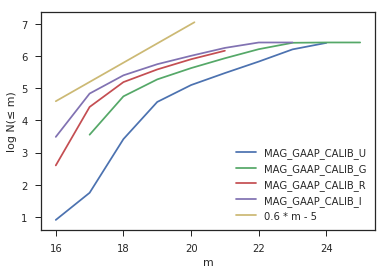

In [31]:
number_count_analysis(catalog, c=5, linear_range=(16, 20))

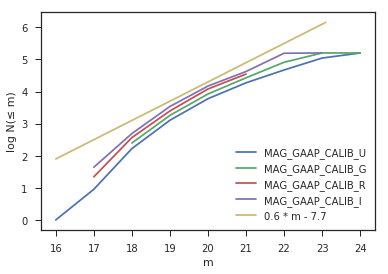

In [32]:
number_count_analysis(qso_catalog, c=7.7, linear_range=(16, 23))

# Maps

## Create maps

In [29]:
nside = 128

In [30]:
# map_stars, lon, lat = get_weighted_map(nside=128)

In [32]:
map_stars = np.loadtxt('/home/snakoneczny/workspace/kids_quasars/outputs/maps/GAIA_DR2_nside-{}_hpxmap.txt'.format(nside))

In [33]:
map_kids_sdss, lon, lat = get_map(kids_x_sdss['GAL_LONG'], kids_x_sdss['GAL_LAT'], nside=nside)

In [34]:
map_qso_kids_sdss, _, _ = get_map(qso_kids_sdss['GAL_LONG'], qso_kids_sdss['GAL_LAT'], nside=nside)

In [35]:
map_catalog, _, _ = get_map(catalog['GAL_LONG'], catalog['GAL_LAT'], nside=nside)

In [36]:
map_catalog_star, _, _ = get_map(catalog_star['GAL_LONG'], catalog_star['GAL_LAT'], nside=nside)

In [37]:
map_qso_catalog, _, _ = get_map(qso_catalog['GAL_LONG'], qso_catalog['GAL_LAT'], nside=nside)

In [38]:
tmp = qso_catalog.loc[qso_catalog['QSO'] > 0.7]
map_qso_catalog_high, _, _ = get_map(tmp['GAL_LONG'], tmp['GAL_LAT'], nside=nside)

In [39]:
map_qso_normalized = normalize_map(map_qso_catalog, map_catalog)

In [40]:
qso_catalog_parts = get_kids_parts(qso_catalog)
catalog_parts = get_kids_parts(catalog)

In [41]:
map_qso_catalog_parts = [get_map(part['GAL_LONG'], part['GAL_LAT'], nside=nside)[0] for part in qso_catalog_parts]

In [42]:
map_catalog_parts = [get_map(part['GAL_LONG'], part['GAL_LAT'], nside=nside)[0] for part in catalog_parts]

## Correlations

In [62]:
# nside = 128
maps_x = [('catalog', map_catalog), ('QSO cat.', map_qso_catalog), ('QSO cat. norm.', map_qso_normalized),
          ('QSO cat. high', map_qso_catalog_high)]
maps_x.extend([('catalog part {}'.format(i + 1), m) for i, m in enumerate(map_catalog_parts)])
maps_x.extend([('qso part {}'.format(i + 1), m) for i, m in enumerate(map_qso_catalog_parts)])
maps_y = [('catalog', map_catalog), ('stars', map_stars), ('train', map_kids_sdss), ('train QSO', map_qso_kids_sdss)]

show_correlations(maps_x, maps_y)

pearson r


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/home/snakoneczny/tools/python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/snakoneczny/tools/python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


catalog     stars     train  train QSO
catalog         1.000000  0.198913  0.500185   0.440786
QSO cat.        0.826865  0.332136  0.389768   0.341191
QSO cat. norm. -0.052294  0.132918 -0.007397  -0.006921
QSO cat. high   0.829692  0.238548  0.385138   0.349256
catalog part 1  1.000000  0.005282  0.731607   0.565616
catalog part 2  0.996855  0.096239  0.677024   0.560872
catalog part 3  0.988716  0.264153  0.431719   0.380615
catalog part 4  1.000000  0.053184       NaN        NaN
catalog part 5  1.000000  0.284522       NaN        NaN
qso part 1      0.908904 -0.149536  0.690798   0.574560
qso part 2      0.921079  0.131774  0.634022   0.592986
qso part 3      0.829613 -0.023072  0.508410   0.454055
qso part 4      0.866781  0.330014       NaN        NaN
qso part 5      0.723480  0.773140       NaN        NaN

pearson p


catalog         stars          train      train QSO
catalog          0.000000e+00  2.414020e-25  7.316781e-170  5.940522e-128
QSO cat.         0.000000e+00  7.321671e-69   2.650849e-96   8.365885e-73
QSO cat. norm.   7.265893e-03  7.443320e-12   7.043380e-01   7.225528e-01
QSO cat. high    0.000000e+00  3.605546e-35   2.955796e-93   6.449623e-76
catalog part 1   0.000000e+00  8.904172e-01  2.036036e-115   5.219382e-59
catalog part 2   0.000000e+00  2.044233e-02   5.388582e-79   2.302789e-49
catalog part 3   0.000000e+00  5.256765e-08   3.906960e-20   1.190188e-15
catalog part 4   0.000000e+00  1.989664e-01   1.000000e+00   1.000000e+00
catalog part 5   0.000000e+00  2.242026e-09   1.000000e+00   1.000000e+00
qso part 1      1.839904e-257  9.743106e-05   1.019415e-96   1.830951e-60
qso part 2      7.767078e-235  1.616537e-03   2.031053e-65   2.029415e-55
qso part 3      8.286152e-105  6.421764e-01   3.334366e-28   3.814662e-22
qso part 4      6.856761e-176  3.980994e-16   1.000000e+00   1.000000e+00
qso part 5       2.499842e-67  2.643030e-82   1.000000e+00   1.000000e+00

correlation coefficient


catalog     stars     train  train QSO
catalog         1.000000  0.198913  0.500185   0.440786
QSO cat.        0.826865  0.332136  0.389768   0.341191
QSO cat. norm. -0.052294  0.132918 -0.007397  -0.006921
QSO cat. high   0.829692  0.238548  0.385138   0.349256
catalog part 1  1.000000  0.005282  0.731607   0.565616
catalog part 2  0.996855  0.096239  0.677024   0.560872
catalog part 3  0.988716  0.264153  0.431719   0.380615
catalog part 4  1.000000  0.053184       NaN        NaN
catalog part 5  1.000000  0.284522       NaN        NaN
qso part 1      0.908904 -0.149536  0.690798   0.574560
qso part 2      0.921079  0.131774  0.634022   0.592986
qso part 3      0.829613 -0.023072  0.508410   0.454055
qso part 4      0.866781  0.330014       NaN        NaN
qso part 5      0.723480  0.773140       NaN        NaN

In [90]:
# nside = 1028
maps_x = [('catalog', map_catalog), ('QSO cat.', map_qso_catalog), ('QSO cat. norm.', map_qso_normalized),
          ('QSO cat. high', map_qso_catalog_high)]
maps_x.extend([('catalog part {}'.format(i + 1), m) for i, m in enumerate(map_catalog_parts)])
maps_x.extend([('qso part {}'.format(i + 1), m) for i, m in enumerate(map_qso_catalog_parts)])
maps_y = [('catalog', map_catalog), ('stars', map_stars), ('train', map_kids_sdss), ('train QSO', map_qso_kids_sdss)]

show_correlations(maps_x, maps_y)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/home/snakoneczny/tools/python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/snakoneczny/tools/python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


pearson r


catalog     stars     train  train QSO
catalog         1.000000  0.237991  0.203738   0.085433
QSO cat.        0.337000  0.292477  0.068676   0.116461
QSO cat. norm. -0.390771  0.009480 -0.043505   0.054973
QSO cat. high   0.259760  0.190576  0.067282   0.120338
catalog part 1  1.000000  0.179682  0.215928   0.081101
catalog part 2  0.998677  0.197835  0.238498   0.089151
catalog part 3  0.999035  0.196304  0.192728   0.082187
catalog part 4  1.000000  0.184304       NaN        NaN
catalog part 5  1.000000  0.385981       NaN        NaN
qso part 1      0.258860 -0.013758  0.092897   0.160306
qso part 2      0.240709  0.050818  0.100751   0.186776
qso part 3      0.201760  0.000631  0.126765   0.178961
qso part 4      0.270800  0.131641       NaN        NaN
qso part 5      0.669265  0.644801       NaN        NaN

pearson p


catalog          stars          train      train QSO
catalog          0.000000e+00   0.000000e+00   0.000000e+00  1.616545e-218
QSO cat.         0.000000e+00   0.000000e+00   1.307803e-92  1.043949e-263
QSO cat. norm.   0.000000e+00   4.885484e-03   3.404407e-38   5.828623e-60
QSO cat. high    0.000000e+00   0.000000e+00   1.958085e-69  6.743255e-219
catalog part 1   0.000000e+00  2.290502e-252   0.000000e+00   2.789984e-52
catalog part 2   0.000000e+00  1.590398e-271   0.000000e+00   8.109263e-56
catalog part 3   0.000000e+00  1.579993e-188  1.145934e-181   4.942642e-34
catalog part 4   0.000000e+00  6.461176e-225   1.000000e+00   1.000000e+00
catalog part 5   0.000000e+00   0.000000e+00   1.000000e+00   1.000000e+00
qso part 1       0.000000e+00   2.704124e-02   1.344658e-50  3.307350e-148
qso part 2      1.185840e-273   1.884471e-13   2.312436e-48  1.203523e-163
qso part 3      6.281070e-110   9.450601e-01   5.655206e-44   1.604996e-86
qso part 4       0.000000e+00   2.997348e-79   1.000000e+00   1.000000e+00
qso part 5       0.000000e+00   0.000000e+00   1.000000e+00   1.000000e+00

correlation coefficient


catalog     stars     train  train QSO
catalog         1.000000  0.237991  0.203738   0.085433
QSO cat.        0.337000  0.292477  0.068676   0.116461
QSO cat. norm. -0.390771  0.009480 -0.043505   0.054973
QSO cat. high   0.259760  0.190576  0.067282   0.120338
catalog part 1  1.000000  0.179682  0.215928   0.081101
catalog part 2  0.998677  0.197835  0.238498   0.089151
catalog part 3  0.999035  0.196304  0.192728   0.082187
catalog part 4  1.000000  0.184304       NaN        NaN
catalog part 5  1.000000  0.385981       NaN        NaN
qso part 1      0.258860 -0.013758  0.092897   0.160306
qso part 2      0.240709  0.050818  0.100751   0.186776
qso part 3      0.201760  0.000631  0.126765   0.178961
qso part 4      0.270800  0.131641       NaN        NaN
qso part 5      0.669265  0.644801       NaN        NaN

In [44]:
maps_x = [('catalog star', map_catalog), ('QSO', map_qso_catalog), ('QSO norm.', map_qso_normalized)]
maps_x.extend([('catalog part {}'.format(i + 1), m) for i, m in enumerate(map_catalog_parts)])
maps_x.extend([('qso part {}'.format(i + 1), m) for i, m in enumerate(map_qso_catalog_parts)])
maps_y = [('catalog star', map_catalog), ('stars', map_stars), ('train', map_kids_sdss), ('train QSO', map_qso_kids_sdss)]

show_correlations(maps_x, maps_y)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/home/snakoneczny/tools/python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/snakoneczny/tools/python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


catalog star     stars     train  train QSO
catalog star        1.000000  0.050682  0.436336   0.413529
QSO                 0.831139  0.024129  0.327231   0.260863
QSO norm.          -0.247903 -0.029695 -0.144699  -0.194798
catalog part 1      1.000000  0.062841  0.587830   0.499358
catalog part 2      0.997052  0.013893  0.622509   0.546308
catalog part 3      0.995071 -0.044401  0.254542   0.231786
catalog part 4      1.000000  0.060187       NaN        NaN
catalog part 5      1.000000 -0.035029       NaN        NaN
qso part 1          0.847110  0.028481  0.664780   0.518019
qso part 2          0.925905  0.022437  0.605434   0.518634
qso part 3          0.714433  0.021952  0.400961   0.285637
qso part 4          0.939214  0.052290       NaN        NaN
qso part 5          0.974263 -0.020412       NaN        NaN

catalog star     stars          train      train QSO
catalog star     0.000000e+00  0.008786  1.250537e-124  6.878353e-111
QSO              0.000000e+00  0.216428   1.386735e-66   4.142720e-42
QSO norm.        4.531752e-38  0.128174   9.281316e-14   7.182669e-24
catalog part 1   0.000000e+00  0.101569   1.991629e-64   3.609217e-44
catalog part 2   0.000000e+00  0.739570   5.365968e-63   4.773917e-46
catalog part 3   0.000000e+00  0.368681   1.628109e-07   1.980880e-06
catalog part 4   0.000000e+00  0.146310   1.000000e+00   1.000000e+00
catalog part 5   0.000000e+00  0.471899   1.000000e+00   1.000000e+00
qso part 1      4.007259e-186  0.461070   6.387616e-87   2.067816e-47
qso part 2      1.820745e-241  0.593608   4.232406e-58   1.996511e-40
qso part 3       5.991865e-65  0.658409   3.441944e-17   4.235428e-09
qso part 4      3.845442e-269  0.209777   1.000000e+00   1.000000e+00
qso part 5      3.226706e-262  0.682509   1.000000e+00   1.000000e+00

catalog star     stars     train  train QSO
catalog star        1.000000  0.050682  0.436336   0.413529
QSO                 0.831139  0.024129  0.327231   0.260863
QSO norm.          -0.247903 -0.029695 -0.144699  -0.194798
catalog part 1      1.000000  0.062841  0.587830   0.499358
catalog part 2      0.997052  0.013893  0.622509   0.546308
catalog part 3      0.995071 -0.044401  0.254542   0.231786
catalog part 4      1.000000  0.060187       NaN        NaN
catalog part 5      1.000000 -0.035029       NaN        NaN
qso part 1          0.847110  0.028481  0.664780   0.518019
qso part 2          0.925905  0.022437  0.605434   0.518634
qso part 3          0.714433  0.021952  0.400961   0.285637
qso part 4          0.939214  0.052290       NaN        NaN
qso part 5          0.974263 -0.020412       NaN        NaN

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


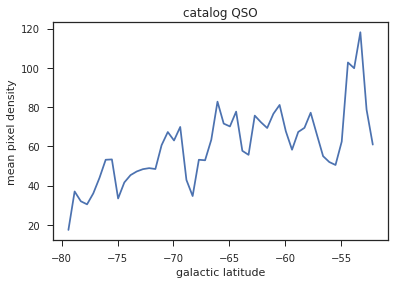

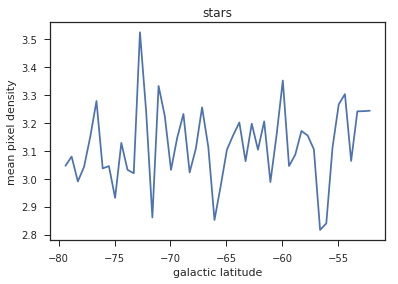

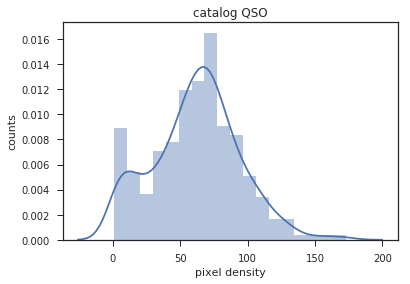

In [45]:
%matplotlib inline
plot_map_stats(map_qso_catalog_parts[3], lat, map_stars, 'catalog QSO')

## Map visualization

<IPython.core.display.Javascript object>


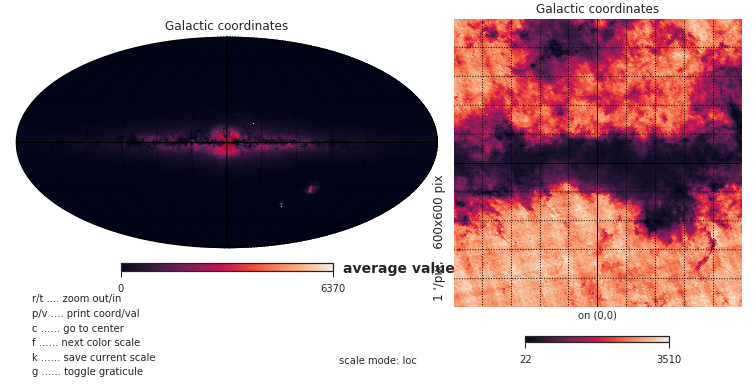

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


In [42]:
%matplotlib notebook
plot_map(map_stars, unit='average value per pixel', is_cmap=False)

[       0        1        2 ... 12681405 12681406 12681407]


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


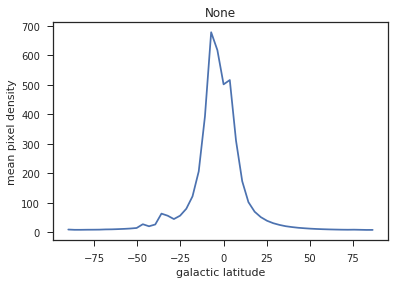

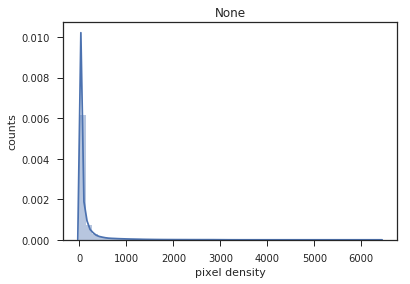

In [48]:
%matplotlib inline
plot_non_zero_map_stats(map_stars, lat)

<IPython.core.display.Javascript object>


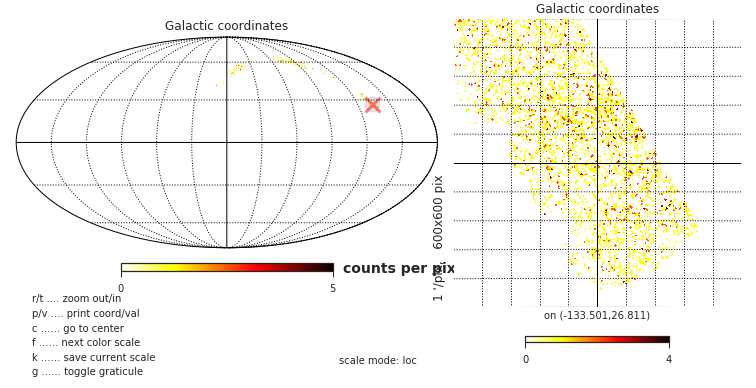

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


In [63]:
%matplotlib notebook
plot_map(map_kids_sdss)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


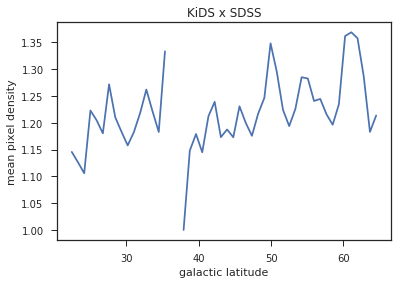

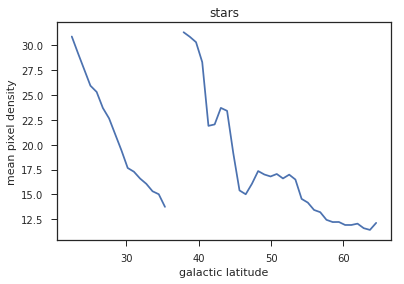

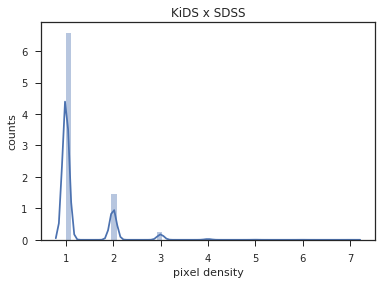

In [65]:
%matplotlib inline
plot_non_zero_map_stats(map_kids_sdss, lat, map_stars, 'KiDS x SDSS')

<IPython.core.display.Javascript object>


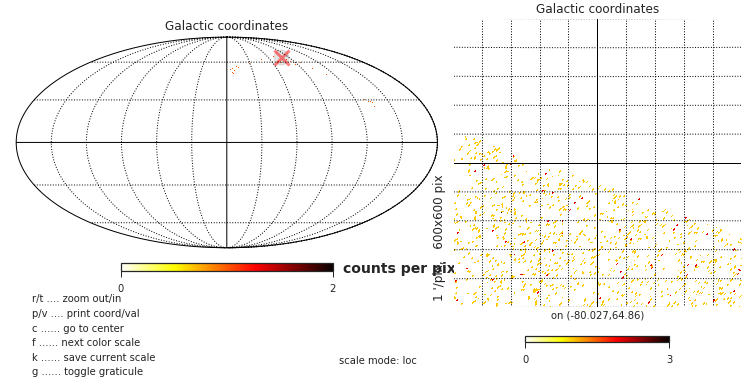

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


In [69]:
%matplotlib notebook
plot_map(map_qso_kids_sdss)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


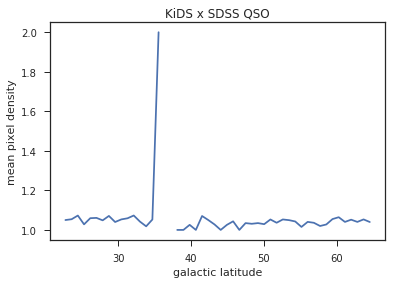

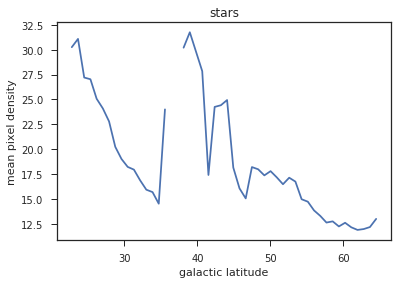

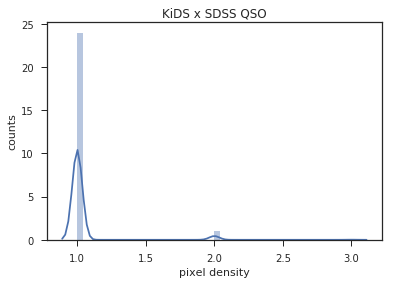

In [71]:
%matplotlib inline
plot_non_zero_map_stats(map_qso_kids_sdss, lat, map_stars, 'KiDS x SDSS QSO')

<IPython.core.display.Javascript object>


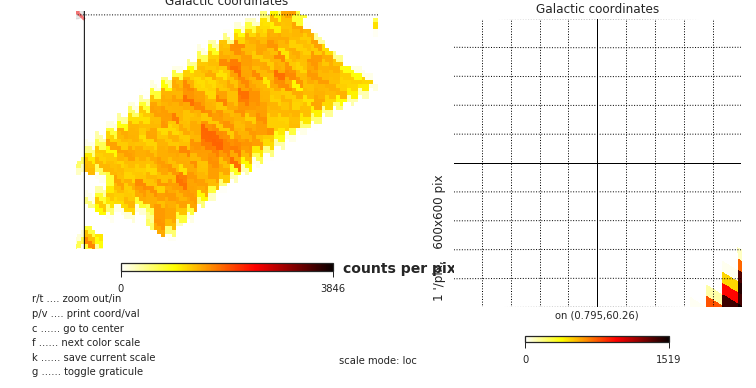

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


In [46]:
%matplotlib notebook
plot_map(map_catalog)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


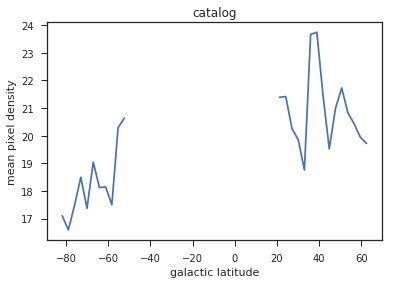

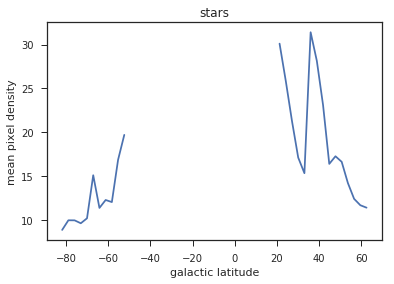

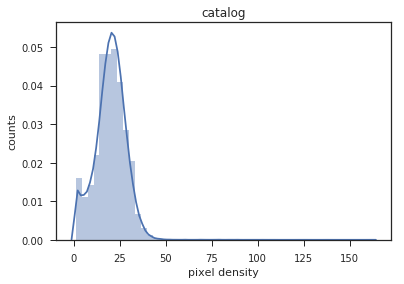

In [73]:
%matplotlib inline
plot_non_zero_map_stats(map_catalog, lat, map_stars, 'catalog')

<IPython.core.display.Javascript object>


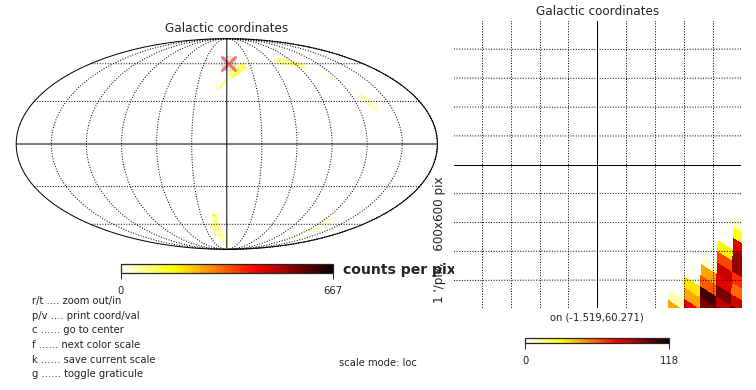

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


In [47]:
%matplotlib notebook
plot_map(map_qso_catalog)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


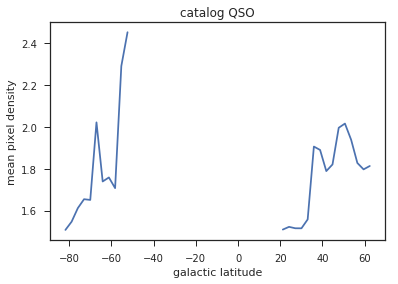

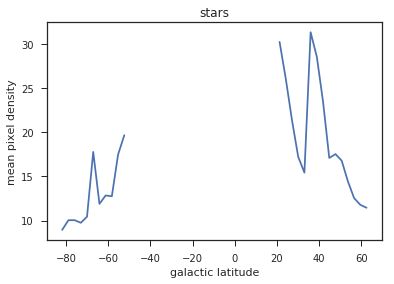

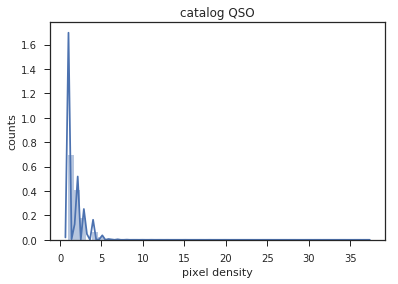

In [75]:
%matplotlib inline
plot_non_zero_map_stats(map_qso_catalog, lat, map_stars, 'catalog QSO')

<IPython.core.display.Javascript object>


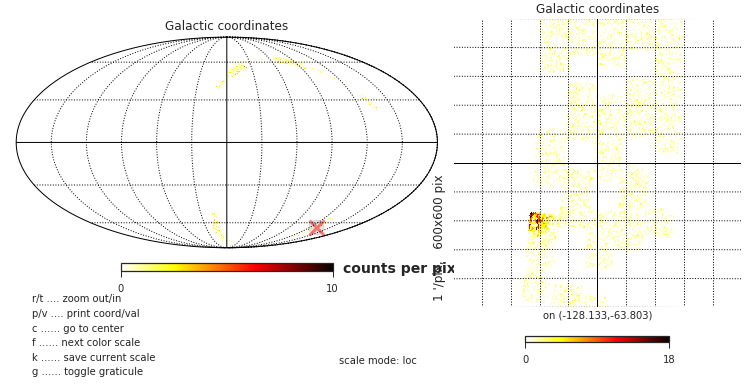

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


In [88]:
%matplotlib notebook
plot_map(map_qso_catalog_high)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


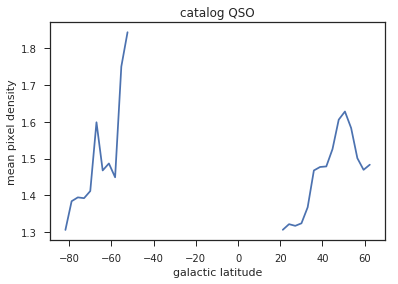

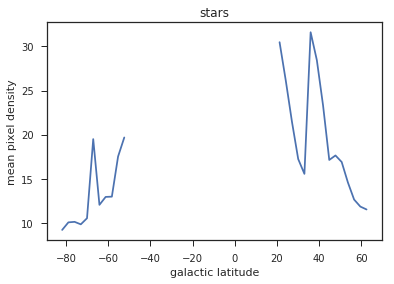

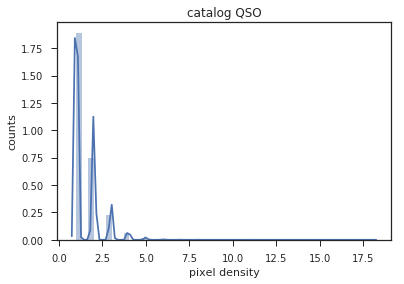

In [89]:
%matplotlib inline
plot_non_zero_map_stats(map_qso_catalog_high, lat, map_stars, 'catalog QSO')

<IPython.core.display.Javascript object>


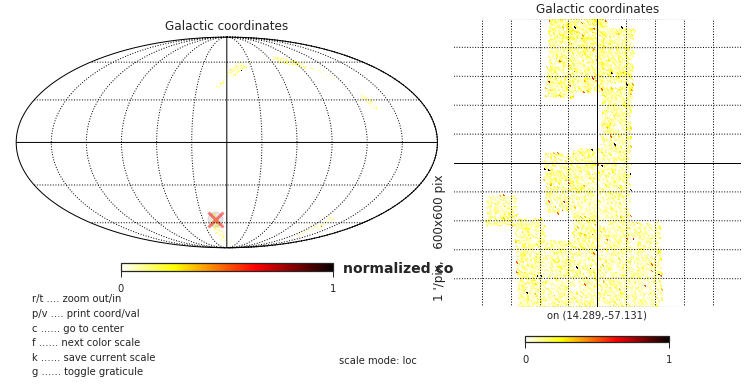

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


In [76]:
%matplotlib notebook
plot_map(map_qso_normalized, unit='normalized counts per pixel')

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


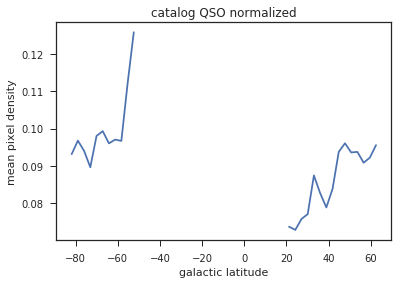

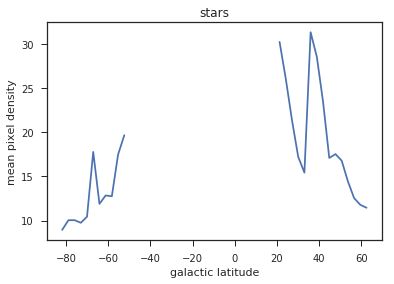

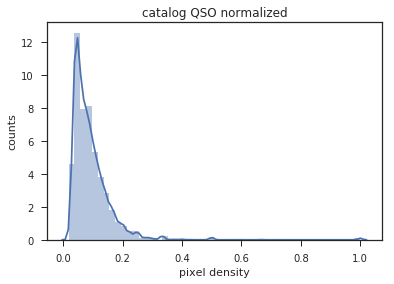

In [79]:
%matplotlib inline
plot_non_zero_map_stats(map_qso_normalized, lat, map_stars, 'catalog QSO normalized')

# Predictions

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


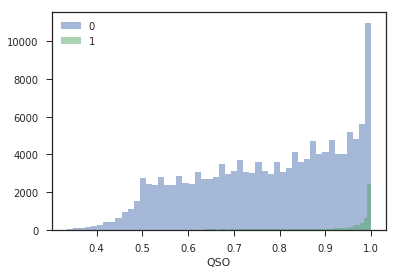

In [43]:
for t in [0, 1]:
    sns.distplot(catalog_star.loc[(catalog_star['train'] == t) & (catalog_star['CLASS'] == 'QSO')]['QSO'], label=str(t), kde=False, rug=False, hist_kws={'alpha': 0.5})
plt.legend()

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


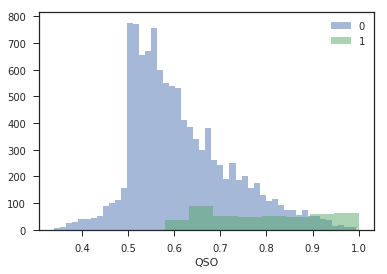

In [44]:
for t in [0, 1]:
    sns.distplot(catalog_non_star.loc[(catalog_non_star['train'] == t) & (catalog_non_star['CLASS'] == 'QSO')]['QSO'], label=str(t), kde=False, rug=False, hist_kws={'alpha': 0.5})
plt.legend()